In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [77]:
import apafib
data = apafib.load_NASDAQ()
columns = data.columns
data = data.to_numpy()
data_t = []
for day in range(len(data)):
    try:
        data_t.append(np.append(data[day],[bool(data[day][0] > data[day-1][0])]))
    except IndexError:
        data_t.append(np.append(data[day],False))
data = pd.DataFrame(data_t,columns=[*columns, 'target'])
data.head()

,GOOGLE-P,GOOGLE-V,GOOGLE-GAP,MSFT-P,MSFT-V,MSFT-GAP,AAPL-P,AAPL-V,AAPL-GAP,INTEL-P,INTEL-V,INTEL-GAP,AMD-P,AMD-V,AMD-GAP,target
0,45.3330,18846560.0,0.4800,72.15,17698800.0,0.78,39.3025,105320280.0,0.6950,34.92,26479700.0,0.58,12.05,58786300.0,0.560,0.0
1,46.2345,23326400.0,0.7192,73.16,14333220.0,0.89,39.9450,86259560.0,0.4950,34.65,26093400.0,0.57,12.17,38946780.0,0.230,1.0
2,46.3500,21771500.0,0.5285,72.72,13758650.0,0.62,39.9950,77507760.0,0.3975,34.66,19775620.0,0.43,12.48,44193270.0,0.585,1.0
3,46.0640,25323820.0,0.7670,72.69,17097240.0,0.79,39.8175,79128680.0,0.5475,34.71,14283180.0,0.34,12.50,37161680.0,0.320,0.0
4,45.7945,21055280.0,0.5027,72.82,12790300.0,0.87,39.9650,100738400.0,0.3225,34.67,14714810.0,0.35,12.43,29650370.0,0.320,0.0


In [78]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
GOOGLE-P,1259.0,8.235332e+01,3.232053e+01,4.533300e+01,5.610350e+01,6.736500e+01,1.129415e+02,1.507090e+02
GOOGLE-V,1259.0,3.091715e+07,1.347789e+07,6.935060e+06,2.256946e+07,2.773012e+07,3.531136e+07,1.238938e+08
GOOGLE-GAP,1259.0,1.740178e+00,1.209965e+00,2.380000e-01,8.713000e-01,1.371000e+00,2.218750e+00,9.215500e+00
MSFT-P,1259.0,1.818206e+02,7.862105e+01,7.215000e+01,1.081500e+02,1.634900e+02,2.524850e+02,3.431100e+02
MSFT-V,1259.0,2.953929e+07,1.299424e+07,7.425603e+06,2.125149e+07,2.629290e+07,3.374066e+07,1.109450e+08
MSFT-GAP,1259.0,3.812815e+00,2.912805e+00,3.400000e-01,1.660000e+00,3.060000e+00,5.141250e+00,2.364000e+01
AAPL-P,1259.0,9.035068e+01,4.626909e+01,3.554750e+01,4.748250e+01,7.193250e+01,1.336400e+02,1.820100e+02
AAPL-V,1259.0,1.184749e+08,5.504025e+07,4.099995e+07,8.193916e+07,1.042700e+08,1.382814e+08,4.268848e+08
AAPL-GAP,1259.0,2.068242e+00,1.694044e+00,2.135000e-01,7.762500e-01,1.502500e+00,2.925000e+00,1.281000e+01
INTEL-P,1259.0,5.089460e+01,6.684044e+00,3.452000e+01,4.672000e+01,5.059000e+01,5.538000e+01,6.847000e+01


In [79]:
# fig, axes = plt.subplots(5,3,figsize=(15,15))
# for i, c in enumerate(data.columns):
#     ax = axes.reshape(-1)[i]
#     if data[c].dtype.kind == 'O':
#         a = sns.countplot(x=c,data=data,ax=ax)
#     else:
#         b = sns.histplot(x=c,data=data,ax=ax)
# plt.tight_layout()

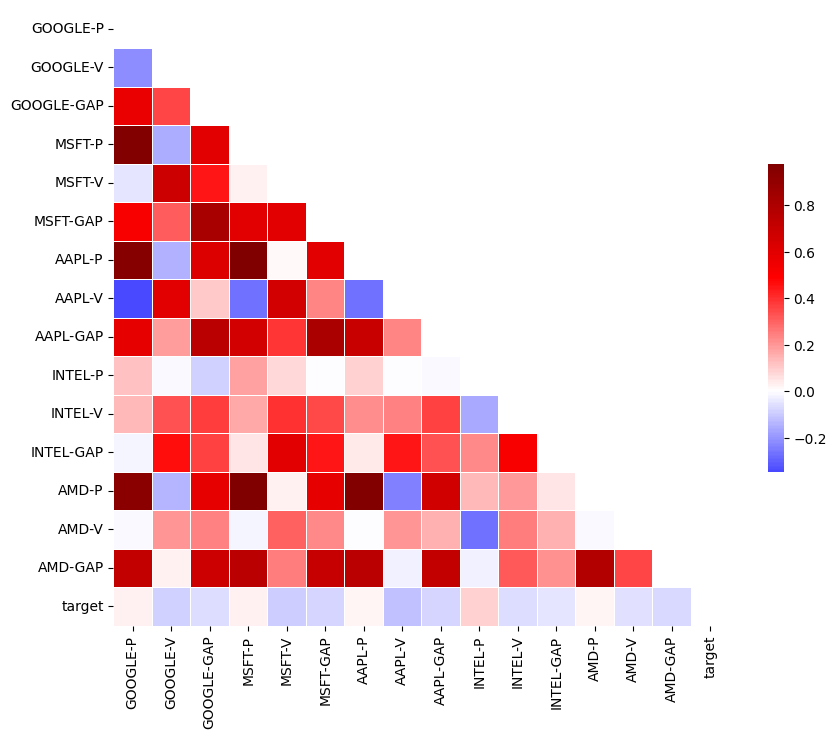

In [80]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [81]:
data_train = data.iloc[:1000]
data_test = data.iloc[1000:]
w = 3

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train_n = scaler.fit_transform(data_train.to_numpy())
data_test_n = scaler.transform(data_test.to_numpy())

In [107]:
data_train_n[0]

array([0.        , 0.10184359, 0.04724717, 0.        , 0.09923934,
       0.02111324, 0.03305385, 0.1569647 , 0.0382249 , 0.00798344,
       0.11461069, 0.04399524, 0.02306847, 0.15265091, 0.04867257,
       0.        ])

In [109]:
from numpy.lib.stride_tricks import sliding_window_view
windows_train = sliding_window_view(data_train_n, w+1, axis=0).copy()
windows_test = sliding_window_view(data_test_n, w+1, axis=0).copy()

X_train_w, y_train_w = windows_train.squeeze()[:,:-1], windows_train.squeeze()[:,-1]
X_test_w, y_test_w = windows_test.squeeze()[:,:-1], windows_test.squeeze()[:,-1]

print(X_train_w)


[[[0.         0.00955875 0.01078341 0.00775091]
  [0.10184359 0.14014632 0.12685189 0.15722431]
  [0.04724717 0.09394768 0.05671613 0.10327997]
  ...
  [0.02306847 0.02416697 0.02700476 0.02718784]
  [0.15265091 0.08922711 0.10599931 0.08352043]
  [0.04867257 0.01216814 0.05143805 0.02212389]]

 [[0.00955875 0.01078341 0.00775091 0.00489336]
  [0.14014632 0.12685189 0.15722431 0.1207282 ]
  [0.09394768 0.05671613 0.10327997 0.05167903]
  ...
  [0.02416697 0.02700476 0.02718784 0.02654705]
  [0.08922711 0.10599931 0.08352043 0.05950796]
  [0.01216814 0.05143805 0.02212389 0.02212389]]

 [[0.01078341 0.00775091 0.00489336 0.00379063]
  [0.12685189 0.15722431 0.1207282  0.12624296]
  [0.05671613 0.10327997 0.05167903 0.0255369 ]
  ...
  [0.02700476 0.02718784 0.02654705 0.02471622]
  [0.10599931 0.08352043 0.05950796 0.07765458]
  [0.05143805 0.02212389 0.02212389 0.02986726]]

 ...

 [[0.96432567 0.96165897 0.97132375 0.97234166]
  [0.10370271 0.0820125  0.04220907 0.05668631]
  [0.37368

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=1000)
print(np.mean(cross_val_score(lr,X_train_w,y_train_w,cv=10)))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/juli/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/juli/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1146, in fit
    check_classification_targets(y)
  File "/home/juli/.local/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [94]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from skopt import BayesSearchCV
param = {'hidden_layer_sizes':[100, 200, 300], 
         'activation':['relu',  'logistic'], 
         'alpha':[0.0001, 0.001, 0.01],
         'momentum': [0.95, 0.90, 0.85], 
         'learning_rate_init': [0.001, 0.01, 0.1],
         'n_iter_no_change':[30, 40, 50], 
         'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs = BayesSearchCV(mlp,param,n_iter=15, 
                        cv=TimeSeriesSplit(n_splits=5, gap=w+1), 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1, 
                        refit=True, random_state=0)    
mlp_bs.fit(X_train_w, y_train_w);

KeyboardInterrupt: 